# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [4]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)



1회차 실습 과제: 통계적 사고와 기술통계


In [5]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [6]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [17]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f'산술평균:{df["EMISSIONS"].mean():.2f}')
print(f'중앙값:{df["EMISSIONS"].median():.2f}')
print(f'최빈값:{df["EMISSIONS"].mode().values}')
# TODO 2: 절사평균 계산
print(f'절사평균 (10%):{stats.trim_mean(df["EMISSIONS"], 0.1):.2f}')
print(f'절사평균 (20%):{stats.trim_mean(df["EMISSIONS"], 0.2):.2f}')

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
target_classes = ['COMPACT', 'MID-SIZE', 'SUV - SMALL']
df_filtered = df[df['VEHICLE CLASS'].isin(target_classes)]

# 선택된 클래스별 평균 계산
class_mean = df_filtered.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
display(class_mean.round(2))

weights = np.array([50, 30, 20]) #클래스 별 가중치
weighted_mean = np.average(class_mean.values, weights=weights)

print(f'\n가중평균 (COMPACT 50%, MID-SIZE 30%, SUV 20%): {weighted_mean:.2f}')
print(f'가중평균:{weighted_mean:.2f}')
# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
compact_mean = df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].mean()
midsize_mean = df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].mean()
suv_mean = df[df['VEHICLE CLASS'] == 'SUV - SMALL']['EMISSIONS'].mean() 
compact_median = df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].median()
midsize_median = df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].median()
suv_median = df[df['VEHICLE CLASS'] == 'SUV - SMALL']['EMISSIONS'].median()
print(f"경차 평균: {compact_mean:.2f}")
print(f"중형차 평균: {midsize_mean:.2f}")
print(f"SUV 평균: {suv_mean:.2f}")
print(f"경차 중앙값: {compact_median:.2f}")
print(f"중형차 중앙값: {midsize_median:.2f}")
print(f"SUV 중앙값: {suv_median:.2f}")

# TODO 5: 결과 해석 (print문으로 작성)
print("="*60)
print("결과 해석")
print("="*60)
print(f"전체 차량의 평균 CO2 배출량: {df["EMISSIONS"].mean():.2f} g/km")
print(f"일반적인 차량의 배출량(중앙값): {df["EMISSIONS"].median():.2f} g/km")
print(f"차량 크기별 배출량 순위: COMPACT < MID-SIZE < SUV")
print(f"시장 가중 평균 배출량: {weighted_mean:.2f} g/km")
print(f"\n시사점:")
print(f"평균과 중앙값의 차이({df["EMISSIONS"].mean() - df["EMISSIONS"].median():.2f})는 고배출 차량의 존재를 나타냅니다.")

산술평균:250.07
중앙값:243.00
최빈값:[221]
절사평균 (10%):247.34
절사평균 (20%):245.40


VEHICLE CLASS
COMPACT        211.54
MID-SIZE       223.70
SUV - SMALL    230.34
Name: EMISSIONS, dtype: float64


가중평균 (COMPACT 50%, MID-SIZE 30%, SUV 20%): 218.95
가중평균:218.95
경차 평균: 211.54
중형차 평균: 223.70
SUV 평균: 230.34
경차 중앙값: 207.00
중형차 중앙값: 221.00
SUV 중앙값: 228.00
결과 해석
전체 차량의 평균 CO2 배출량: 250.07 g/km
일반적인 차량의 배출량(중앙값): 243.00 g/km
차량 크기별 배출량 순위: COMPACT < MID-SIZE < SUV
시장 가중 평균 배출량: 218.95 g/km

시사점:
평균과 중앙값의 차이(7.07)는 고배출 차량의 존재를 나타냅니다.


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

,구분,평균,표준편차,최솟값,최댓값
0,COMB (L/100 km),11.03,2.91,3.6,26.1
1,ENGINE SIZE,3.36,1.34,0.8,8.4


변동계수(%)

연비의 변동계수: 26.38%
엔진크기의 변동계수: 39.78%


,변수,평균,표준편차,변동계수(%)
0,COMB (L/100 km),11.03,2.91,26.38
1,ENGINE SIZE,3.36,1.34,39.78


이상치와 z점수

[IQR Method]
Q1 (25%): 9.10
Q3 (75%): 12.70
IQR (Q3-Q1): 3.60
하한(Q1 - 1.5*IQR): 3.70
상한(Q3 + 1.5*IQR): 18.10
이상치 갯수: 548개 (2.4%)

[Z-score Method]
평균: 11.03
표준편차: 2.91
기준: |Z-score| > 3
이상치 개수: 219개 (1.0%)

이상치 탐지 방법 비교:
IQR 방법: 548개 (2.4%)
Z-score 방법: 219개 (1.0%)

 - IQR은 분포 가정이 없어 더 많은 이상치를 탐지한다.
 - Z-score는 정규분포를 가정하며 극단적 이상치만 탐지한다.
시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯

차량등급별 표준편차 비교

[연비 통계]


,mean,std,min,max
VEHICLE CLASS,,,,
COMPACT,9.17,2.06,3.7,17.9
MID-SIZE,9.75,2.40,3.8,20.0
SUV - SMALL,9.95,1.59,5.8,16.5



[엔진크기 통계]


,mean,std,min,max
VEHICLE CLASS,,,,
COMPACT,2.56,1.08,1.0,6.7
MID-SIZE,3.08,1.19,1.4,6.8
SUV - SMALL,2.49,0.69,1.0,6.4



 표준편차 해석:

[연비의 표준편차]
   • COMPACT: 2.06 L/100km (CV: 22.5%)
   • MID-SIZE: 2.40 L/100km (CV: 24.6%)
   • SUV - SMALL: 1.59 L/100km (CV: 15.9%)

[엔진크기의 표준편차]
   • COMPACT: 1.08 L (CV: 42.1%)
   • MID-SIZE: 1.19 L (CV: 38.8%)
   • SUV - SMALL: 0.69 L (CV: 27.8%)

 **연비 변동성이 가장 큰 등급** : MID-SIZE( = 2.40)
 **엔진크기 변동성이 가장 큰 등급** : MID-SIZE( = 1.19)

 **표준편차가 클수록 해당 등급 내에서도 차량 간 차이가 크다** 

종합 결과 해석

[1] 변동성 분석
 연비의 변동계수: 26.38%
 엔진크기의 변동계수: 39.78%
 엔진크기가 연비보다 13.40%p 더 다양하다.

[2] 이상치 분석
 - IQR 방법: 548개 이상치 발견
 - Z-score 방법: 219개 이상치 발견
 - 이상치는 특수 목적 차량이나 고성능/저연비 극단 모델일 가능성

[3] 차량등급별 특징

 COMPACT:
 - 평균 연비: 9.17 ± 2.06 L/100km
 - 평균 엔진: 2.56 L

 MID-SIZE:
 - 평균 연비: 9.75 ± 2.40 L/100km
 - 평균 엔진: 3.08 L

 SUV - SMALL:
 - 평균 연비: 9.95 ± 1.59 L/100km
 - 평균 엔진: 2.49 L

[4] 실무 시사점
 차량 선택 시 등급별 평균뿐 아니라 표준편차도 고려 필요
 변동성이 큰 등급은 모델 간 성능 차이가 크므로 신중한 비교 필요
 이상치는 제거보다는 특수 목적 차량으로 분류하여 별도 분석 권장


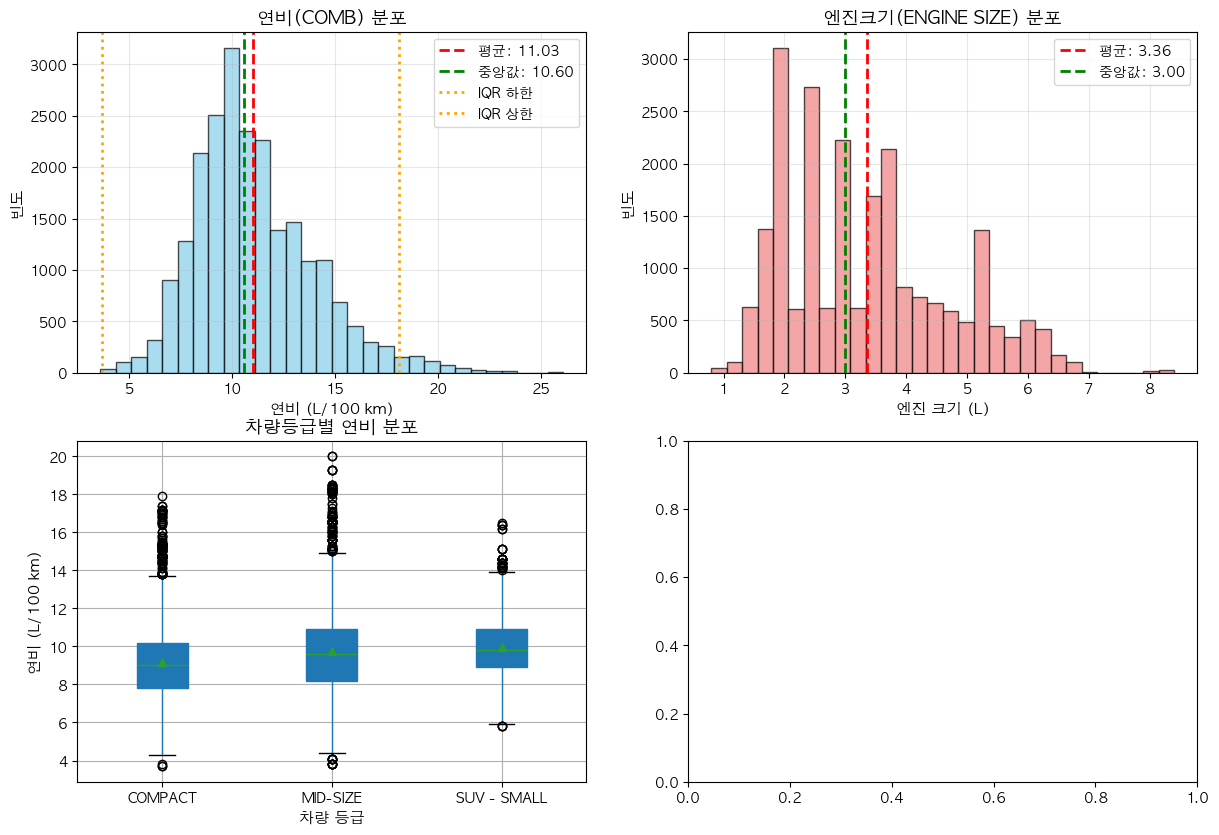

In [19]:
# TODO 1: 두 변수의 산포 측도 계산

df1 = pd.DataFrame({
    '구분': ['COMB (L/100 km)', 'ENGINE SIZE'],
    '평균' : [df['COMB (L/100 km)'].mean(), df['ENGINE SIZE'].mean()],
    '표준편차' : [df['COMB (L/100 km)'].std(), df['ENGINE SIZE'].std()],
    '최솟값' : [df['COMB (L/100 km)'].min(), df['ENGINE SIZE'].min()],
    '최댓값' : [df['COMB (L/100 km)'].max(), df['ENGINE SIZE'].max()],
})
display(df1.round(2))

# TODO 2: 변동계수(CV) 계산
print("="*60)
print("변동계수(%)")
print("="*60)
def calculate_cv(data):
    """변동계수 = (표준편차 / 평균)*100"""
    return (data.std() / data.mean()) * 100

# 연비(COMB)의 변동계수
cv_comb = calculate_cv(df['COMB (L/100 km)'])
print(f"\n연비의 변동계수: {cv_comb:.2f}%")

# 엔진 크기의 변동계수  
cv_engine = calculate_cv(df['ENGINE SIZE'])
print(f"엔진크기의 변동계수: {cv_engine:.2f}%")

# 변동계수 비교를 위한 DataFrame
cv_comparison = pd.DataFrame({
    '변수': ['COMB (L/100 km)', 'ENGINE SIZE'],
    '평균': [df['COMB (L/100 km)'].mean(), df['ENGINE SIZE'].mean()],
    '표준편차': [df['COMB (L/100 km)'].std(), df['ENGINE SIZE'].std()],
    '변동계수(%)': [cv_comb, cv_engine]
})

display(cv_comparison.round(2))

# TODO 3: 이상치 탐지 (IQR, Z-score)
print("="*60)
print("이상치와 z점수")
print("="*60)

#IQR
Q1 = df['COMB (L/100 km)'].quantile(0.25)
Q3 = df['COMB (L/100 km)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['COMB (L/100 km)'] < lower_bound) | (df['COMB (L/100 km)'] > upper_bound)]

print("\n[IQR Method]")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR (Q3-Q1): {IQR:.2f}")
print(f"하한(Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"상한(Q3 + 1.5*IQR): {upper_bound:.2f}")
print(f"이상치 갯수: {len(outliers_iqr)}개 ({len(outliers_iqr)/len(df)*100:.1f}%)")

# Z-score
mean = df['COMB (L/100 km)'].mean()
std = df['COMB (L/100 km)'].std()
z_scores = (df['COMB (L/100 km)'] - mean) / std

outliers_z = df[np.abs(z_scores) > 3]

print("\n[Z-score Method]")
print(f"평균: {mean:.2f}")
print(f"표준편차: {std:.2f}")
print(f"기준: |Z-score| > 3")
print(f"이상치 개수: {len(outliers_z)}개 ({len(outliers_z)/len(df)*100:.1f}%)")

print("\n이상치 탐지 방법 비교:")
print(f"IQR 방법: {len(outliers_iqr)}개 ({len(outliers_iqr)/len(df)*100:.1f}%)")
print(f"Z-score 방법: {len(outliers_z)}개 ({len(outliers_z)/len(df)*100:.1f}%)")
print(f"\n - IQR은 분포 가정이 없어 더 많은 이상치를 탐지한다.")
print(f" - Z-score는 정규분포를 가정하며 극단적 이상치만 탐지한다.")

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
print("="*60)
print("시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 연비(COMB) 히스토그램
axes[0, 0].hist(df['COMB (L/100 km)'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'평균: {mean:.2f}')
axes[0, 0].axvline(df['COMB (L/100 km)'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'중앙값: {df["COMB (L/100 km)"].median():.2f}')
axes[0, 0].axvline(lower_bound, color='orange', linestyle=':', linewidth=2, label=f'IQR 하한')
axes[0, 0].axvline(upper_bound, color='orange', linestyle=':', linewidth=2, label=f'IQR 상한')
axes[0, 0].set_xlabel('연비 (L/100 km)', fontsize=11)
axes[0, 0].set_ylabel('빈도', fontsize=11)
axes[0, 0].set_title('연비(COMB) 분포', fontsize=13, weight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 엔진크기 히스토그램
axes[0, 1].hist(df['ENGINE SIZE'], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].axvline(df['ENGINE SIZE'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'평균: {df["ENGINE SIZE"].mean():.2f}')
axes[0, 1].axvline(df['ENGINE SIZE'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'중앙값: {df["ENGINE SIZE"].median():.2f}')
axes[0, 1].set_xlabel('엔진 크기 (L)', fontsize=11)
axes[0, 1].set_ylabel('빈도', fontsize=11)
axes[0, 1].set_title('엔진크기(ENGINE SIZE) 분포', fontsize=13, weight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 차량등급별 연비 박스플롯
target_classes = ['COMPACT', 'MID-SIZE', 'SUV - SMALL']
df_filtered = df[df['VEHICLE CLASS'].isin(target_classes)]

df_filtered.boxplot(column='COMB (L/100 km)', by='VEHICLE CLASS', ax=axes[1, 0], 
                    patch_artist=True, showmeans=True)
axes[1, 0].set_xlabel('차량 등급', fontsize=11)
axes[1, 0].set_ylabel('연비 (L/100 km)', fontsize=11)
axes[1, 0].set_title('차량등급별 연비 분포', fontsize=13, weight='bold')
axes[1, 0].get_figure().suptitle('')  # 기본 제목 제거

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교

print("\n" + "="*60)
print("차량등급별 표준편차 비교")
print("="*60)

# 차량등급별 통계량 계산
stats_by_class = df_filtered.groupby('VEHICLE CLASS').agg({
    'COMB (L/100 km)': ['mean', 'std', 'min', 'max'],
    'ENGINE SIZE': ['mean', 'std', 'min', 'max']
})

print("\n[연비 통계]")
display(stats_by_class['COMB (L/100 km)'].round(2))

print("\n[엔진크기 통계]")
display(stats_by_class['ENGINE SIZE'].round(2))

# 표준편차 비교
print("\n 표준편차 해석:")
comb_std = stats_by_class['COMB (L/100 km)']['std']
engine_std = stats_by_class['ENGINE SIZE']['std']

print(f"\n[연비의 표준편차]")
for vehicle_class in comb_std.index:
    std_val = comb_std[vehicle_class]
    mean_val = stats_by_class['COMB (L/100 km)']['mean'][vehicle_class]
    cv = (std_val / mean_val) * 100
    print(f"   • {vehicle_class}: {std_val:.2f} L/100km (CV: {cv:.1f}%)")

print(f"\n[엔진크기의 표준편차]")
for vehicle_class in engine_std.index:
    std_val = engine_std[vehicle_class]
    mean_val = stats_by_class['ENGINE SIZE']['mean'][vehicle_class]
    cv = (std_val / mean_val) * 100
    print(f"   • {vehicle_class}: {std_val:.2f} L (CV: {cv:.1f}%)")

# 가장 변동성이 큰 클래스
max_std_class_comb = comb_std.idxmax()
max_std_class_engine = engine_std.idxmax()

print(f"\n **연비 변동성이 가장 큰 등급** : {max_std_class_comb}( = {comb_std[max_std_class_comb]:.2f})")
print(f" **엔진크기 변동성이 가장 큰 등급** : {max_std_class_engine}( = {engine_std[max_std_class_engine]:.2f})")
print(f"\n **표준편차가 클수록 해당 등급 내에서도 차량 간 차이가 크다** ")


# TODO 6: 결과 해석

print("\n" + "="*60)
print("종합 결과 해석")
print("="*60)

print("\n[1] 변동성 분석")
print(f" 연비의 변동계수: {cv_comb:.2f}%")
print(f" 엔진크기의 변동계수: {cv_engine:.2f}%")
if cv_comb > cv_engine:
    print(f" 연비가 엔진크기보다 {cv_comb - cv_engine:.2f}%p 더 다양하다.")
    print(f" 같은 엔진크기라도 연비는 다른 요인(무게, 공기역학 등)에 더 영향을 받는다.")
else:
    print(f" 엔진크기가 연비보다 {cv_engine - cv_comb:.2f}%p 더 다양하다.")

print(f"\n[2] 이상치 분석")
print(f" - IQR 방법: {len(outliers_iqr)}개 이상치 발견")
print(f" - Z-score 방법: {len(outliers_z)}개 이상치 발견")
print(f" - 이상치는 특수 목적 차량이나 고성능/저연비 극단 모델일 가능성")

print(f"\n[3] 차량등급별 특징")
for vehicle_class in target_classes:
    comb_mean = stats_by_class['COMB (L/100 km)']['mean'][vehicle_class]
    comb_std = stats_by_class['COMB (L/100 km)']['std'][vehicle_class]
    engine_mean = stats_by_class['ENGINE SIZE']['mean'][vehicle_class]
    print(f"\n {vehicle_class}:")
    print(f" - 평균 연비: {comb_mean:.2f} ± {comb_std:.2f} L/100km")
    print(f" - 평균 엔진: {engine_mean:.2f} L")

print(f"\n[4] 실무 시사점")
print(f" 차량 선택 시 등급별 평균뿐 아니라 표준편차도 고려 필요")
print(f" 변동성이 큰 등급은 모델 간 성능 차이가 크므로 신중한 비교 필요")
print(f" 이상치는 제거보다는 특수 목적 차량으로 분류하여 별도 분석 권장")



---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

왜도(Skewness)와 첨도(Kurtosis) 계산

[왜도(Skewness)]
ENGINE SIZE        0.631
COMB (L/100 km)    0.817
COMB (mpg)         1.173
EMISSIONS          0.535
dtype: float64

[첨도(Kurtosis)]
ENGINE SIZE       -0.395
COMB (L/100 km)    1.055
COMB (mpg)         3.644
EMISSIONS          0.615
dtype: float64


,변수,평균,중앙값,표준편차,왜도,왜도_해석,첨도,첨도_해석
0,ENGINE SIZE,3.357,3.0,1.335,0.631,오른쪽 꼬리 (양의 왜도),-0.395,정규분포와 유사
1,COMB (L/100 km),11.034,10.6,2.911,0.817,오른쪽 꼬리 (양의 왜도),1.055,뾰족한 분포 (두꺼운 꼬리)
2,COMB (mpg),27.375,27.0,7.377,1.173,오른쪽 꼬리 (양의 왜도),3.644,뾰족한 분포 (두꺼운 꼬리)
3,EMISSIONS,250.068,243.0,59.355,0.535,오른쪽 꼬리 (양의 왜도),0.615,뾰족한 분포 (두꺼운 꼬리)



분포 시각화 (히스토그램 + KDE)


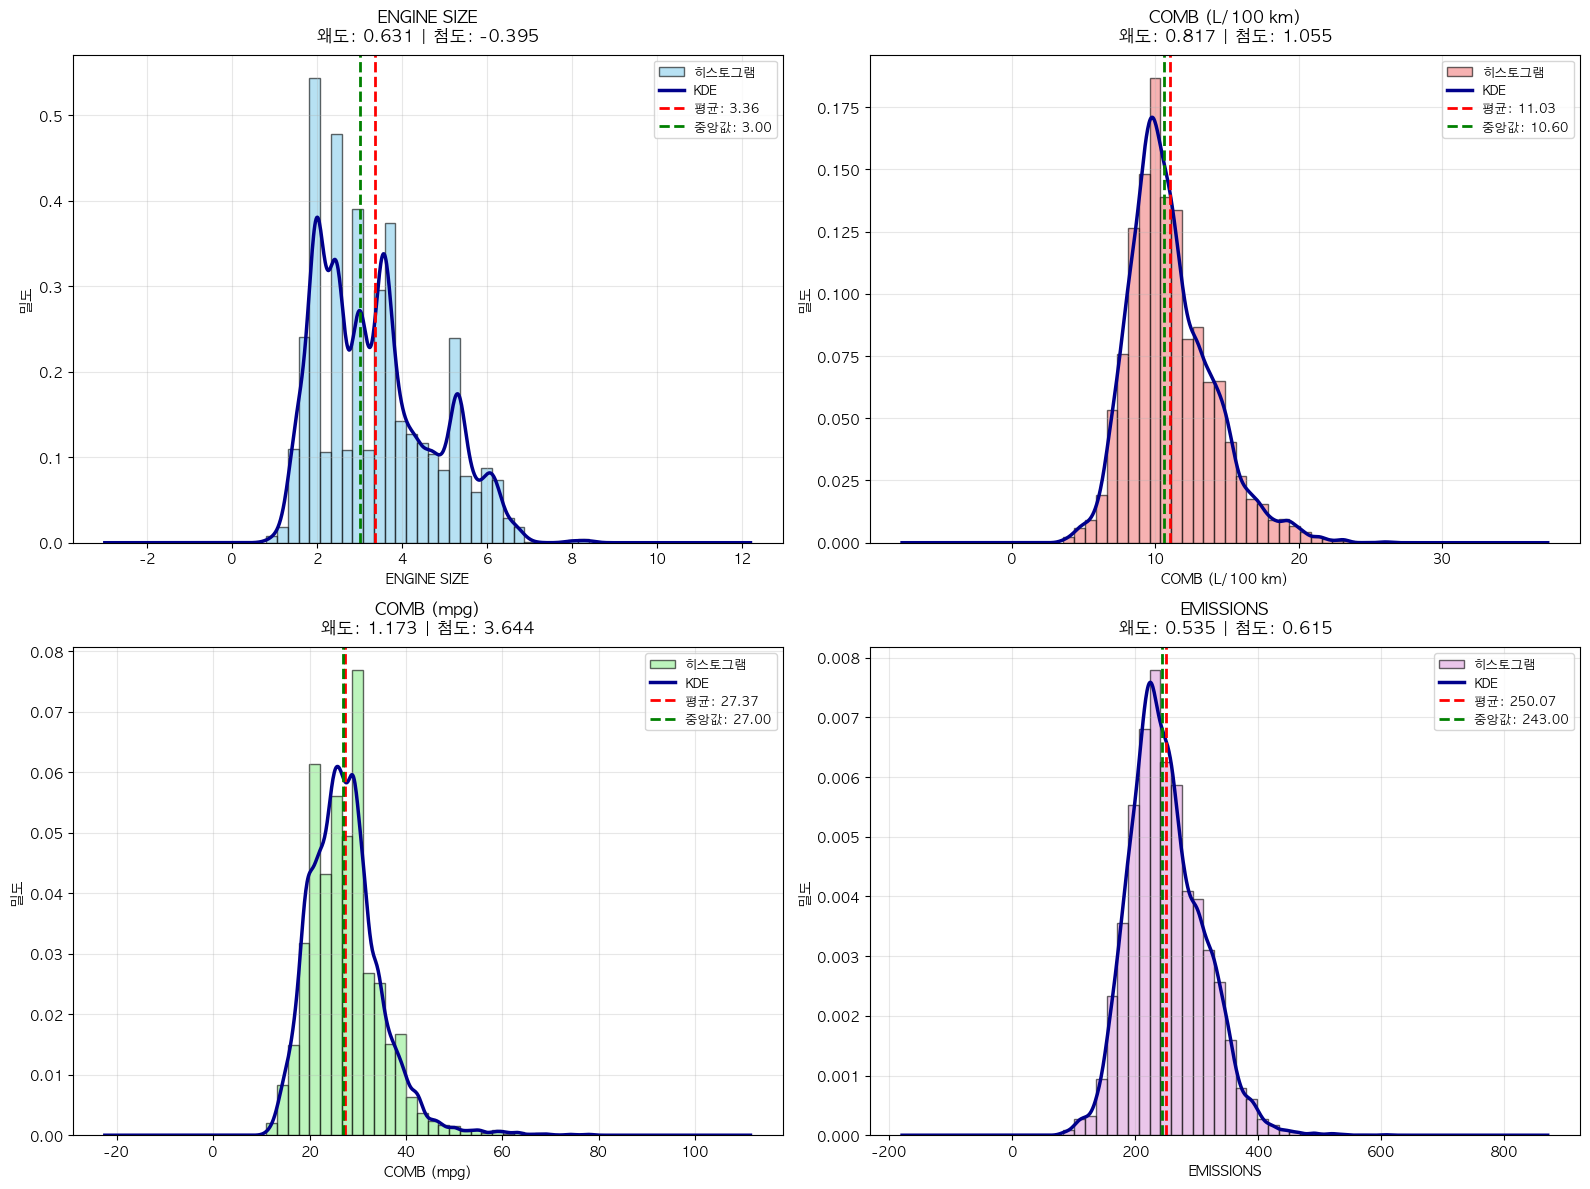


연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교


,연료타입,갯수,평균,중앙값,표준편차,왜도,첨도,왜도_해석,첨도_해석
3,X,11822,240.281,232.0,59.327,0.331,-0.293,대칭적 분포,정규분포와 유사
4,Z,9316,260.575,248.0,58.334,0.997,1.608,오른쪽 꼬리 (양의 왜도),뾰족한 분포 (두꺼운 꼬리)
1,E,1071,270.579,275.0,47.375,-0.189,-0.256,대칭적 분포,정규분포와 유사
0,D,314,230.306,246.0,51.148,-0.368,-1.043,대칭적 분포,평평한 분포 (얇은 꼬리)
2,N,33,312.848,319.0,47.798,-1.852,3.071,왼쪽 꼬리 (음의 왜도),뾰족한 분포 (두꺼운 꼬리)



 상위 4개 연료타입 분포 시각화: ['X', 'Z', 'E', 'D']


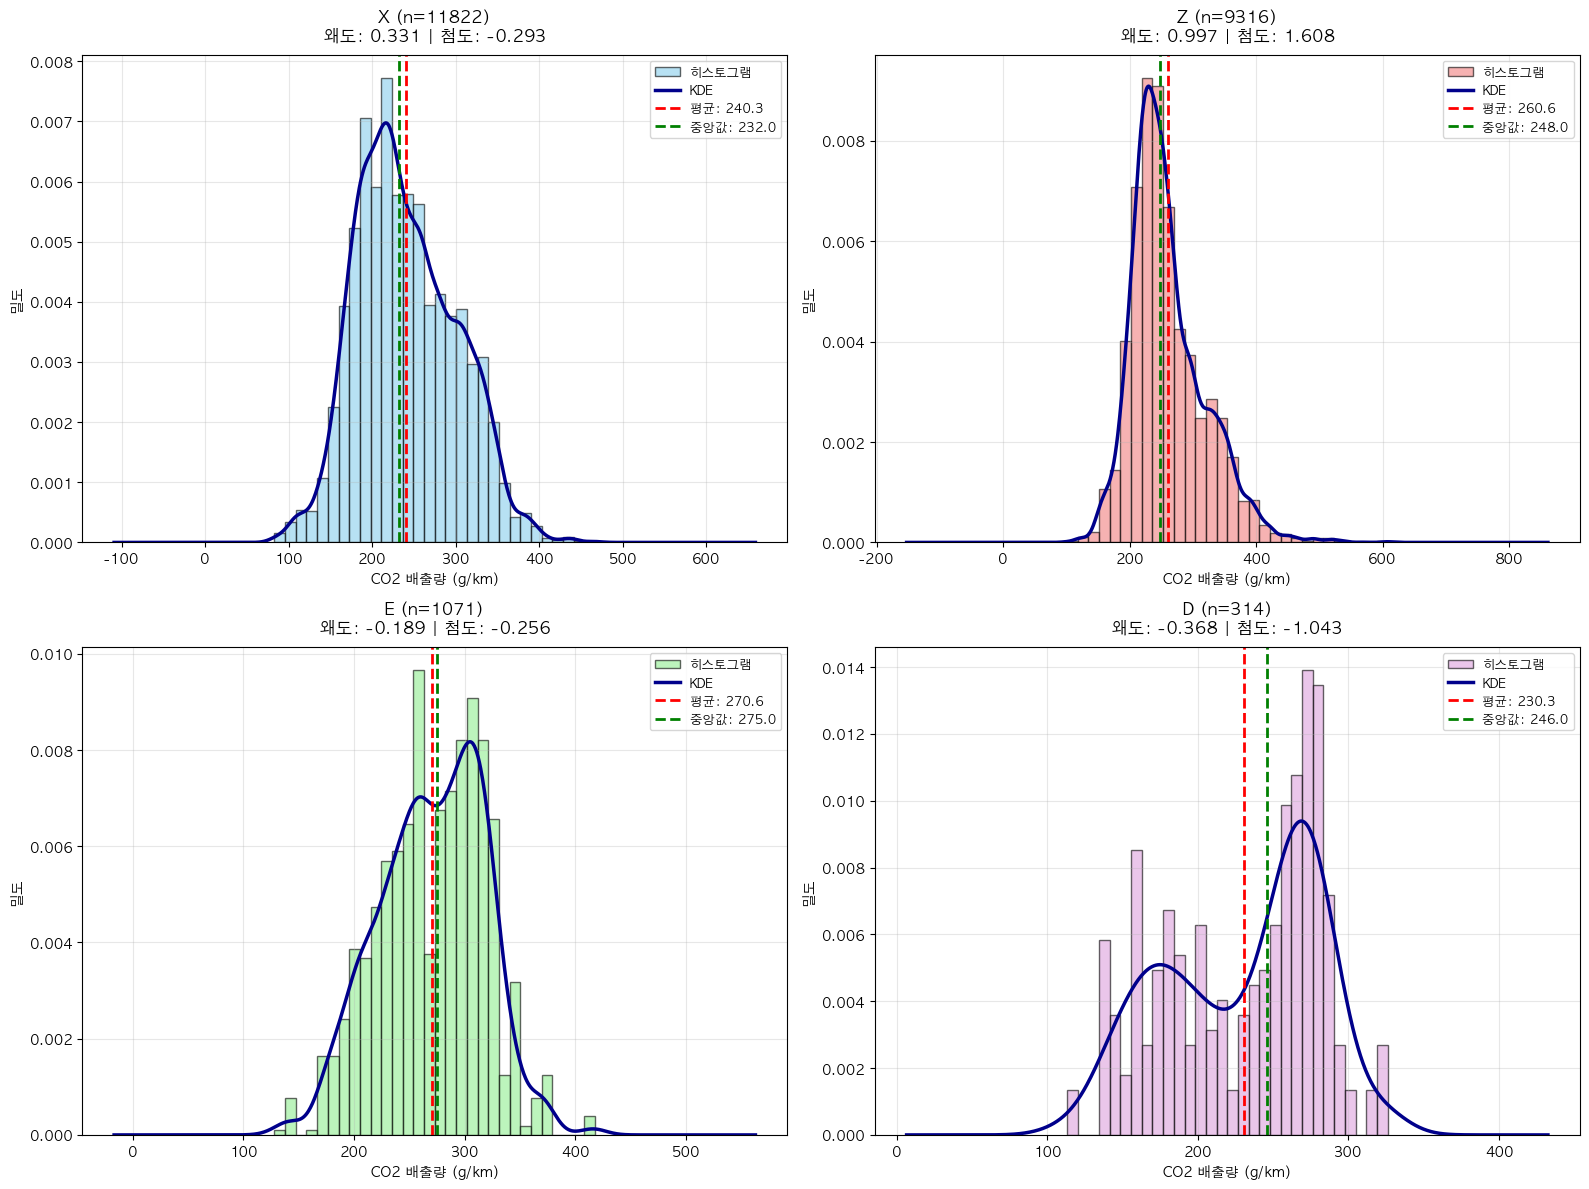


종합 결과 해석

 전체 왜도/첨도 분석
----------------------------------------------------------------------

 ENGINE SIZE
 왜도: 0.63 (오른쪽 꼬리 (양의 왜도))
 첨도: -0.39 (정규분포와 유사)
 평균: 3.36 | 중앙값: 3.00
 - 평균(3.36) > 중앙값(3.00)
 - 높은 값의 이상치가 존재하여 오른쪽으로 치우침
 - 대표값으로 중앙값이 더 적합할 수 있음
 - 정규분포와 유사한 첨도

 COMB (L/100 km)
 왜도: 0.82 (오른쪽 꼬리 (양의 왜도))
 첨도: 1.05 (뾰족한 분포 (두꺼운 꼬리))
 평균: 11.03 | 중앙값: 10.60
 - 평균(11.03) > 중앙값(10.60)
 - 높은 값의 이상치가 존재하여 오른쪽으로 치우침
 - 대표값으로 중앙값이 더 적합할 수 있음
 - 정규분포보다 뾰족하고 극단값이 많음(두꺼운 꼬리).
 - 이상치 신경써야 함

 COMB (mpg)
 왜도: 1.17 (오른쪽 꼬리 (양의 왜도))
 첨도: 3.64 (뾰족한 분포 (두꺼운 꼬리))
 평균: 27.37 | 중앙값: 27.00
 - 평균(27.37) > 중앙값(27.00)
 - 높은 값의 이상치가 존재하여 오른쪽으로 치우침
 - 대표값으로 중앙값이 더 적합할 수 있음
 - 정규분포보다 뾰족하고 극단값이 많음(두꺼운 꼬리).
 - 이상치 신경써야 함

 EMISSIONS
 왜도: 0.53 (오른쪽 꼬리 (양의 왜도))
 첨도: 0.62 (뾰족한 분포 (두꺼운 꼬리))
 평균: 250.07 | 중앙값: 243.00
 - 평균(250.07) > 중앙값(243.00)
 - 높은 값의 이상치가 존재하여 오른쪽으로 치우침
 - 대표값으로 중앙값이 더 적합할 수 있음
 - 정규분포보다 뾰족하고 극단값이 많음(두꺼운 꼬리).
 - 이상치 신경써야 함


In [26]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

df2 = df[numeric_cols]

# TODO 1: 왜도/첨도 계산

print("="*60)
print("왜도(Skewness)와 첨도(Kurtosis) 계산")
print("="*60)

skewness = df2.skew()
kurtosis = df2.kurtosis()

print("\n[왜도(Skewness)]")
print(skewness.round(3))

print("\n[첨도(Kurtosis)]")
print(kurtosis.round(3))

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)

# 왜도 해석 함수
def interpret_skewness(skew_val):
    if abs(skew_val) < 0.5:
        return "대칭적 분포"
    elif skew_val >= 0.5:
        return "오른쪽 꼬리 (양의 왜도)"
    else:
        return "왼쪽 꼬리 (음의 왜도)"

# 첨도 해석 함수
def interpret_kurtosis(kurt_val):
    if abs(kurt_val) < 0.5:
        return "정규분포와 유사"
    elif kurt_val >= 0.5:
        return "뾰족한 분포 (두꺼운 꼬리)"
    else:
        return "평평한 분포 (얇은 꼬리)"

# 결과 DataFrame 생성

result_df = pd.DataFrame({
    '변수': numeric_cols,
    '평균': [df2[col].mean() for col in numeric_cols],
    '중앙값': [df2[col].median() for col in numeric_cols],
    '표준편차': [df2[col].std() for col in numeric_cols],
    '왜도': [skewness[col] for col in numeric_cols],
    '왜도_해석': [interpret_skewness(skewness[col]) for col in numeric_cols],
    '첨도': [kurtosis[col] for col in numeric_cols],
    '첨도_해석': [interpret_kurtosis(kurtosis[col]) for col in numeric_cols]
})

display(result_df.round(3))


# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)

print("\n" + "="*60)
print("분포 시각화 (히스토그램 + KDE)")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # 히스토그램 + KDE
    ax.hist(df2[col], bins=30, density=True, alpha=0.6, color=colors[idx], 
            edgecolor='black', label='히스토그램')
    
    # KDE 곡선
    df2[col].plot(kind='kde', ax=ax, color='darkblue', linewidth=2.5, label='KDE')
    
    # 평균선
    mean_val = df2[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'평균: {mean_val:.2f}')
    
    # 중앙값선
    median_val = df2[col].median()
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, 
               label=f'중앙값: {median_val:.2f}')
    
    # 제목에 왜도/첨도 표시
    skew_val = skewness[col]
    kurt_val = kurtosis[col]
    ax.set_title(f'{col}\n왜도: {skew_val:.3f} | 첨도: {kurt_val:.3f}', 
                 fontsize=12, weight='bold', pad=10)
    
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('밀도', fontsize=10)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교

print("\n" + "="*60)
print("연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교")
print("="*60)

# 연료타입별 그룹화
fuel_groups = df.groupby('FUEL')['EMISSIONS']

# 각 연료타입별 통계량 계산
fuel_stats = []
for fuel_type, emissions in fuel_groups:
    fuel_stats.append({
        '연료타입': fuel_type,
        '갯수': len(emissions),
        '평균': emissions.mean(),
        '중앙값': emissions.median(),
        '표준편차': emissions.std(),
        '왜도': emissions.skew(),
        '첨도': emissions.kurtosis(),
        '왜도_해석': interpret_skewness(emissions.skew()),
        '첨도_해석': interpret_kurtosis(emissions.kurtosis())
    })

fuel_stats_df = pd.DataFrame(fuel_stats)
fuel_stats_df = fuel_stats_df.sort_values('갯수', ascending=False)

display(fuel_stats_df.round(3))

# 주요 연료타입만 시각화 (샘플 수가 많은 상위 4개)
top_fuels = fuel_stats_df.head(4)['연료타입'].values

print(f"\n 상위 4개 연료타입 분포 시각화: {list(top_fuels)}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, fuel_type in enumerate(top_fuels):
    ax = axes[idx]
    
    emissions_data = df[df['FUEL'] == fuel_type]['EMISSIONS']
    
    # 히스토그램 + KDE
    ax.hist(emissions_data, bins=30, density=True, alpha=0.6, 
            color=colors[idx], edgecolor='black', label='히스토그램')
    emissions_data.plot(kind='kde', ax=ax, color='darkblue', 
                        linewidth=2.5, label='KDE')
    
    # 평균/중앙값
    mean_val = emissions_data.mean()
    median_val = emissions_data.median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'평균: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2,
               label=f'중앙값: {median_val:.1f}')
    
    # 왜도/첨도
    skew_val = emissions_data.skew()
    kurt_val = emissions_data.kurtosis()
    
    ax.set_title(f'{fuel_type} (n={len(emissions_data)})\n왜도: {skew_val:.3f} | 첨도: {kurt_val:.3f}',
                 fontsize=12, weight='bold', pad=10)
    ax.set_xlabel('CO2 배출량 (g/km)', fontsize=10)
    ax.set_ylabel('밀도', fontsize=10)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# TODO 5: 결과 해석

print("\n" + "="*60)
print("종합 결과 해석")
print("="*60)

print("\n 전체 왜도/첨도 분석")
print("-" * 70)

for col in numeric_cols:
    skew = skewness[col]
    kurt = kurtosis[col]
    mean_val = df2[col].mean()
    median_val = df2[col].median()
    
    print(f"\n {col}")
    print(f" 왜도: {skew:.2f} ({interpret_skewness(skew)})")
    print(f" 첨도: {kurt:.2f} ({interpret_kurtosis(kurt)})")
    print(f" 평균: {mean_val:.2f} | 중앙값: {median_val:.2f}")
    
    if skew > 0.5:
        print(f" - 평균({mean_val:.2f}) > 중앙값({median_val:.2f})")
        print(f" - 높은 값의 이상치가 존재하여 오른쪽으로 치우침")
        print(f" - 대표값으로 중앙값이 더 적합할 수 있음")
    elif skew < -0.5:
        print(f" - 평균({mean_val:.2f}) < 중앙값({median_val:.2f})")
        print(f" - 낮은 값의 이상치가 존재하여 왼쪽으로 치우쳐 있음")
    else:
        print(f" - 분포가 대칭적이며 평균과 중앙값이 유사한 경향을 보임")
    
    if kurt > 0.5:
        print(f" - 정규분포보다 뾰족하고 극단값이 많음(두꺼운 꼬리).")
        print(f" - 이상치 신경써야 함")
    elif kurt < -0.5:
        print(f" - 정규분포보다 평평하고 극단값이 적음(얇은 꼬리).")
    else:
        print(f" - 정규분포와 유사한 첨도")

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [ ]:
import math


def my_mean(data):
    """
    리스트의 산술평균을 계산하는 함수
    
    Parameters:
        data (list or array-like): 숫자 리스트 또는 배열
        
    Returns:
        float: 평균값
        
    Raises:
        ValueError: 빈 리스트인 경우
        TypeError: 숫자가 아닌 값이 포함된 경우
    
    Examples:
        >>> my_mean([1, 2, 3, 4, 5])
        3.0
        >>> my_mean([10, 20, 30])
        20.0
    """
    # 빈 리스트 체크
    if len(data) == 0:
        raise ValueError("빈 리스트는 평균을 계산할 수 없습니다.")
    
    # 숫자 타입 체크
    try:
        mean = sum(data) / len(data)
    except TypeError:
        raise TypeError("모든 요소가 숫자여야 합니다.")
    
    return mean

def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """

    # 빈 리스트 체크
    if len(data) == 0:
        raise ValueError("빈 리스트는 평균을 계산할 수 없습니다.")
    
    # 2. proportion 유효성 검사
    if not 0 <= proportion < 0.5:
        raise ValueError("proportion은 0 이상 0.5 미만이어야 합니다.")
    
    # 3. 숫자 타입 체크
    try:
        # 데이터 정렬 (원본 유지를 위해 복사)
        sorted_data = sorted(data)
    except TypeError:
        raise TypeError("모든 요소가 숫자여야 합니다.")
    
    # 4. 제거할 개수 계산
    n = len(sorted_data)
    trim_count = int(n * proportion)  # 양쪽에서 제거할 개수
    
    # 5. 양쪽 끝 제거
    if trim_count == 0:
        # proportion이 0이거나 제거할 개수가 없는 경우
        trimmed_data = sorted_data
    else:
        # 양쪽에서 trim_count개씩 제거
        trimmed_data = sorted_data[trim_count : n - trim_count]
    
    # 6. 절사평균 계산
    if len(trimmed_data) == 0:
        raise ValueError("제거 후 남은 데이터가 없습니다.")
    
    trimmed_mean = sum(trimmed_data) / len(trimmed_data)
    
    return trimmed_mean


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    
def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    # 빈 리스트 체크
    if len(data) == 0 or len(weights) == 0:
        raise ValueError("빈 리스트는 평균을 계산할 수 없습니다.")
    
    # 길이 체크
    if len(data) != len(weights):
        raise ValueError(f"data 길이({len(data)})와 weights 길이({len(weights)})가 같아야 합니다.")
    
    # 가중치 합이 0인지 체크
    weight_sum = sum(weights)
    if weight_sum == 0:
        raise ValueError("가중치의 합이 0이 될 수 없습니다.")
    
    #가중평균 계산
    try:
        # 각 값에 가중치를 곱한 합
        weighted_sum = sum(d * w for d, w in zip(data, weights))
        
        # 가중치 합으로 나누기
        weighted_mean = weighted_sum / weight_sum
        
    except TypeError:
        raise TypeError("모든 요소가 숫자여야 합니다.")
    
    return weighted_mean


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    if len(data) == 0:
        raise ValueError("빈 리스트는 중앙값을 계산할 수 없습니다.")
    
    try:
        sorted_data = sorted(data)
    except TypeError:
        raise TypeError("모든 요소가 숫자여야 합니다.")
    
    n = len(sorted_data)
    
    # 홀수 개: 가운데 값
    if n % 2 == 1:
        median = sorted_data[n // 2]
    
    #짝수 개: 가운데 두 값의 평균
    else:
        mid1 = sorted_data[n // 2 - 1]
        mid2 = sorted_data[n // 2]
        median = (mid1 + mid2) / 2
    
    return median

def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    # 1단계: 횟수를 저장하는 딕셔너리 생성하기 
    count_dict = {}
    
    for value in data:
        if value in count_dict:  
            count_dict[value] += 1 
        else:
            count_dict[value] = 1
    
    # 2단계: 최빈값 찾기
    max_count = 0
    mode = None
    
    for value, count in count_dict.items():
        if count > max_count:
            max_count = count
            mode = value
    
    return mode
            


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    
    if len(data) == 0:
        raise ValueError("빈 리스트는 분산을 계산할 수 없습니다.")
    
    # 평균 계산
    mean = sum(data) / len(data)
    
    # 편차 제곱의 합
    sum_squared_dev = sum((value - mean) ** 2 for value in data)
    
    # 분산 계산
    variance = sum_squared_dev / (len(data) - ddof)
    
    return variance
    



def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    if len(data) == 0:
        raise ValueError("빈 리스트는 표준편차를 계산할 수 없습니다.")
    
    variance = my_variance(data, ddof= ddof)
    stand_dev = variance ** 0.5
    
    return stand_dev


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    if len(data) == 0:
        raise ValueError("빈 리스트는 퍼센트를 계산할 수 없습니다.")
    
    if not 0 <= q <= 100:
        raise ValueError("q는 0과 100 사이여야 합니다.")
    
    # 데이터 정렬 
    sorted_data = sorted(data)
    
    # 인덱스 계산 (Nearest Rank)
    n = len(sorted_data)
    
    # 특수 케이스
    if q == 0:
        return sorted_data[0]
    if q == 100:
        return sorted_data[-1]
    
    # 일반 케이스: (n-1) * (q/100) 공식
    position = (n - 1) * (q / 100)
    
    # 반올림해서 인덱스로 사용
    index = int(position + 0.5)  # 반올림
    
    # 해당 인덱스의 값 반환
    return sorted_data[index]
    
    



def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    
    iqr = my_percentile(data,75) - my_percentile(data,25)
    return iqr

In [30]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
